In this task, I will introduce you to a data science project on income classification with Python programming language. The objective of this task is to classify if a person earns more than 50K per year.

### Data Science Project on Income Classification
The dataset I’m going to use here is publicly available data, so we don’t have to collect and scratch the data, just load it into memory. So let’s start the income classification task with Python by importing the necessary Python libraries and the dataset:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Income Classification with Python\income_evaluation.csv')
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

There is a column that has a rather obscure name: fnlwgt. Upon closer inspection, this variable is translated as “final weight” which represents the total number of people matching that particular row of information. Another thing to note is that each name has a space in front of it. We need to delete it:

In [2]:
df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

Some of the variables have binary or discrete values. We can apply to encode or transform some of the variables from string to category. Since “income” is our target variables, we want it to be numeric for ease of calculation. I’m going to create new variables derived from “income ”:

In [3]:
df['income'].unique()
df['income_encoded'] = [1 if value == ' >50K' else 0 for value in df['income'].values]
df['income_encoded'].unique()
# Let's check some descriptive statistics
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hrs_per_week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observations from the above statistics:

- In the dataset the mean and median age is similar, I guess it will be a normal distribution, we will check it later using visualizations.
- The variables of capital gain and loss are suspect. All observations greater than 0 are in the 4th quartile.
- In the “hrs_per_week” columns, the min is 1 and the max is 99, which is not common in real life. We will have to investigate this later.
- Only about a quarter of the population can earn more than 50,000 a year.

### Income Classification
Let’s see how each profession plays out by comparing the number of people earning over 50K. We’ll look at the total number of workers for each area and the total number of people earning over 50K in each:

<AxesSubplot:ylabel='occupation'>

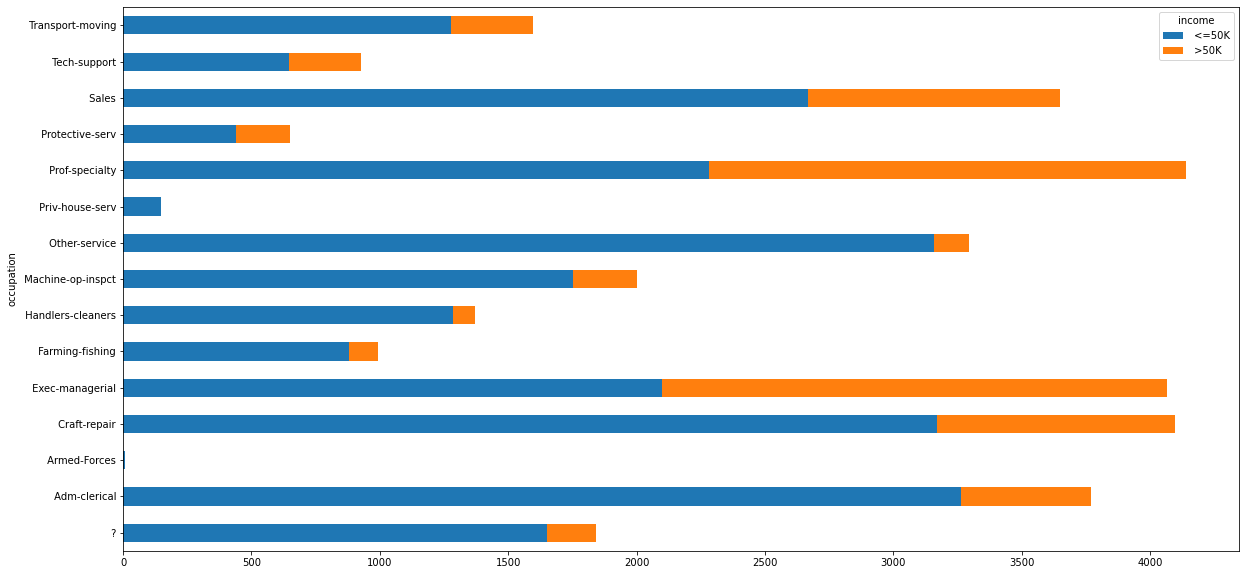

In [4]:
df[df['income'] == ' >50K']['occupation'].value_counts().head(3)
pd.crosstab(df["occupation"], df['income']).plot(kind='barh', stacked=True, figsize=(20, 10))

### Observations:
- The 3 main occupations in total number are the professional speciality, home repair, executive management.
- The top 3 occupations in terms of a total number of people earning more than 50K (in order) are Executive, Occupational Specialties and Handicraft Sales and Repairs (with a close margin).
- Senior executives have the highest percentage of people earning more than 50,000 people: 48%.